Test R2 score: 0.79


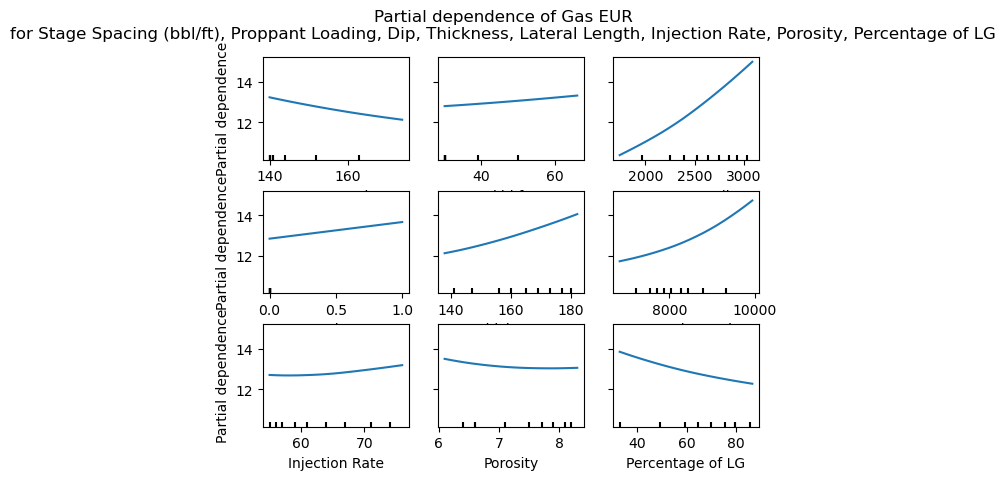

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPRegressor
from sklearn.inspection import partial_dependence
from sklearn.inspection import PartialDependenceDisplay
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

dataset = pd.read_csv("Chapter7_Shale Gas Wells.csv")
x = dataset.iloc[:,0:13]
y = dataset.iloc[:, 13].values
seed = 15
np.random.seed(seed)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)
model = make_pipeline(MinMaxScaler(), MLPRegressor(hidden_layer_sizes = (25, 25),
                                                   learning_rate_init = 0.01, early_stopping = True, max_iter = 500))
model.fit(x_train, y_train)
print("Test R2 score: {:.2f}". format(model.score(x_test, y_test)))
features = ['Stage Spacing', 'bbl/ft', 'Proppant Loading', 'Dip', 'Thickness', 'Lateral Length', 'Injection Rate',
            'Porosity', 'Percentage of LG']
PartialDependenceDisplay.from_estimator(model, x, features, n_jobs = 3, grid_resolution = 20)
fig = plt.gcf()
fig.suptitle('Partial dependence of Gas EUR\n' 'for Stage Spacing (bbl/ft), Proppant Loading, Dip, Thickness, Lateral Length, Injection Rate, Porosity, Percentage of LG')
fig.subplots_adjust(hspace = 0.3)

Text(0.5, 0.98, 'Gas EUR vs. Lateral Length and Proppant Loading')

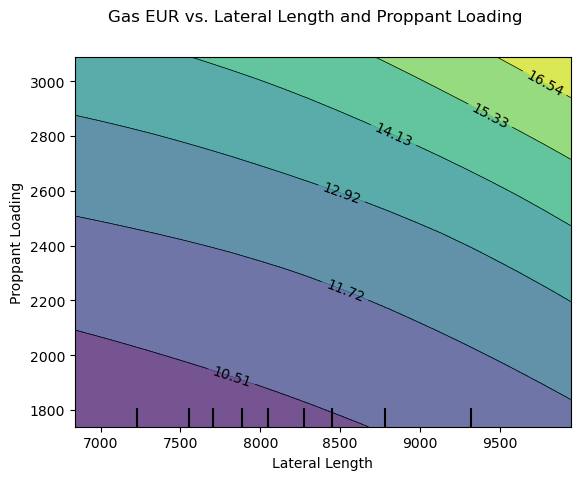

In [2]:
features_LLPL = [('Lateral Length', 'Proppant Loading')]
PartialDependenceDisplay.from_estimator(model, x, features_LLPL, n_jobs = 3, grid_resolution = 20)
fig = plt.gcf()
fig.suptitle('Gas EUR vs. Lateral Length and Proppant Loading')

In [ ]:
"3d INTERACTION PLOTS"